## **Outlier Detection & Removal**

- Outliers can significantly skew the results of a model, leading to inaccurate predictions and misleading interpretations. 

- They can distort statistical analyses, such as mean and standard deviation, which are sensitive to extreme values. 

- This can result in a model that does not generalize well to new data, as it may be overly influenced by these anomalous points. 

- Additionally, outliers can affect the performance of algorithms, particularly those that rely on distance metrics, such as k-nearest neighbors or clustering algorithms. 

- Therefore, it is crucial to identify and handle outliers appropriately to ensure the robustness and reliability of the model.



In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

---
## Load Data

In [122]:
input = '../data/clean-data/flats-house-cleaned-v2.csv'
df = pd.read_csv(input).drop_duplicates()
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3,3,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,2,97
1,flat,raheja vedaanta,sector 108,0.85,4637.0,1833.0,Super Built up area 1833(170.29 sq.m.)Built Up...,3,3,2,2.0,North-East,Relatively New,1833.0,1500.0,1350.00,0,1,0,0,0,0,65
2,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,0.0,NaN,New Property,NaN,NaN,720.00,0,0,0,1,0,1,0
3,flat,laxmi pareena,sector 99a,0.30,6666.0,450.0,Carpet area: 450 (41.81 sq.m.),2,1,0,12.0,North,Undefined,NaN,NaN,450.00,0,0,0,0,0,0,0
4,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,7.0,North,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,2,152


In [123]:
df.shape

(3677, 23)

In [124]:
df.columns.to_list()

['property_type',
 'society',
 'sector',
 'price',
 'price_per_sqft',
 'area',
 'areaWithType',
 'bedRoom',
 'bathroom',
 'balcony',
 'floorNum',
 'facing',
 'agePossession',
 'super_built_up_area',
 'built_up_area',
 'carpet_area',
 'study room',
 'servant room',
 'store room',
 'pooja room',
 'others',
 'furnishing_type',
 'luxury_score']

---
## Outlier Treatment on `price`

- ### Distribution of `Price`

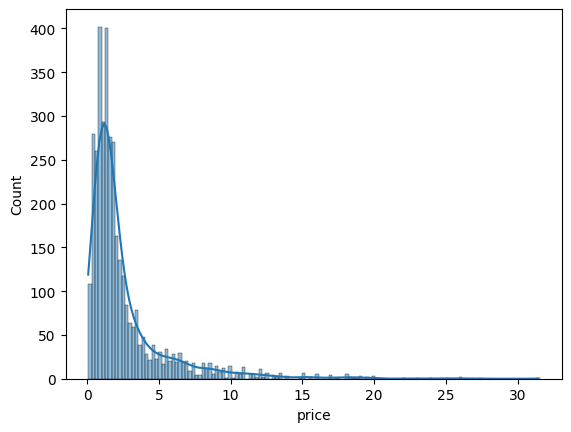

In [125]:
sns.histplot(df['price'], kde=True)
plt.show()

**Observation** :
 - The distribution plot of the price indicates that the data is not normally distributed. 
- This can be observed from the skewness and the presence of outliers in the plot, 
suggesting that the price data may have a heavy tail or be influenced by extreme values.

- ### Box Plot

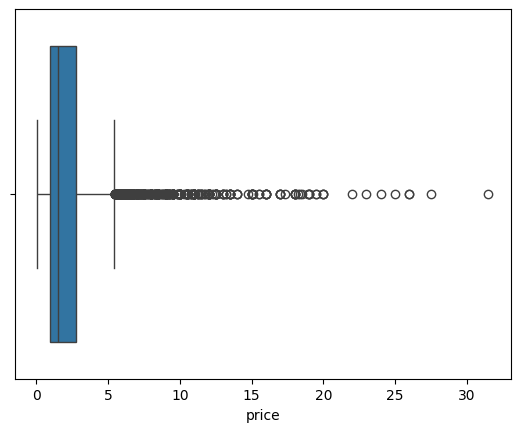

In [126]:
sns.boxplot(x=df['price'])
plt.show()

**Observations** :  Prices higher than 5 are considered outliers in the price column.

###  statistics of outliers in `price`

In [127]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

> There are 425 ouliers and avg of them is 9.2 ; (min ,max) value of oultlier= (5.4,31)

In [128]:
outliers.sort_values('price',ascending=False).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2039,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,74
3327,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
2482,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
3530,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
659,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0


**NOTE** :  On the basis of price column, we can say that there are some genuine outliers but there are some data erros as well

In [129]:
# saving in csv file to look manually in excel sheet
# outliers.to_csv('price-outliers.csv')

- Should We remove or keep these price ouliers ? let's check outlier in other features , It will be clear by observing other features.

---
## Outlier treatment on `Price_per_sqft`

### Distribution of `price_per_sqft`

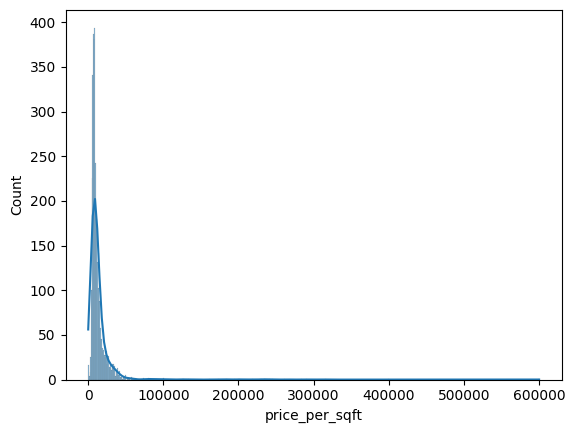

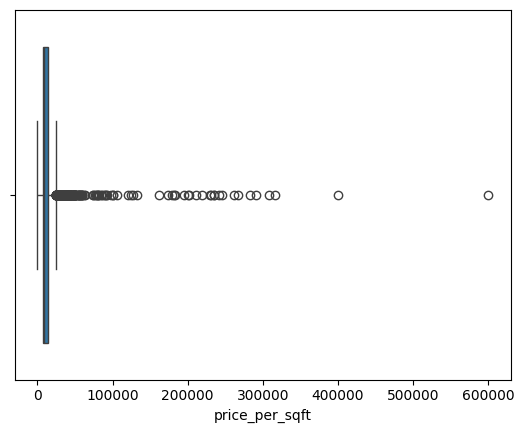

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [130]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.show()

sns.boxplot(x=df['price_per_sqft'])
plt.show()

# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

- Heavily right skewed, definelty outlier or data error

**Observation** : max value of price_per_sqft is 600000 ; it is definetly outlier.


**Note**  : Upon manual observation, I identified a data error:-

areas less than 1000 are actually in square yards, not in square meters.


In [131]:
# Here are the outliers with area less than 1000 square meters.
outliers_sqft[outliers_sqft['area'] < 1000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
22,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0
24,house,eros rosewood villas,sector 49,2.75,178571.0,154.0,Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...,3,3,1,2.0,North-West,Old Property,NaN,NaN,1650.0,0,0,0,0,1,2,80
187,house,independent,sector 7,1.35,40909.0,330.0,Built Up area: 330 (30.66 sq.m.),4,5,0,3.0,NaN,Undefined,NaN,330.0,NaN,0,0,0,0,0,0,0
196,house,dlf city plots,sector 26,4.00,40775.0,981.0,Plot area 109(91.14 sq.m.),4,3,2,2.0,NaN,Relatively New,NaN,981.0,NaN,0,0,0,0,0,2,0
224,house,independent,sector 105,0.50,50000.0,100.0,Built Up area: 100 (9.29 sq.m.),2,2,0,1.0,NaN,Undefined,NaN,100.0,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,house,sushant lok 1 builder floors,sector 43,1.65,30556.0,540.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4,4,3+,4.0,West,Moderately Old,NaN,540.0,500.0,0,0,0,0,1,1,49
3506,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
3514,house,dlf city plots phase 3,sector 24,1.60,29629.0,540.0,Plot area 540(50.17 sq.m.)Built Up area: 540 s...,8,5,3+,4.0,East,Old Property,NaN,540.0,500.0,0,0,0,0,0,0,8
3640,house,malibu towne,sector 47,1.15,41818.0,275.0,Plot area 275(25.55 sq.m.),3,3,3,2.0,North-East,Old Property,NaN,275.0,NaN,0,0,0,0,0,2,33


In [132]:
# Converting area from square yards to square meters for values less than 1000
outliers_sqft.loc[outliers_sqft['area'] < 1000, 'area'] = outliers_sqft['area'].apply(lambda x: x * 0.836127)

# Adjusting area for values less than 1000 square meters
outliers_sqft.loc[outliers_sqft['area'] < 1000, 'area'] = outliers_sqft['area'].apply(lambda x: x * 9)

# Calculating price per square foot based on the updated area
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price'] * 10000000) / outliers_sqft['area'])


/tmp/ipykernel_5374/1019498841.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price'] * 10000000) / outliers_sqft['area'])


In [133]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29927.121469
std      12229.321590
min       3257.000000
25%      25926.000000
50%      30552.500000
75%      36111.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [134]:
# update the original data frame
df.update(outliers_sqft)

#### Checking distribution of `price_per_sqft` after outlier treatment 

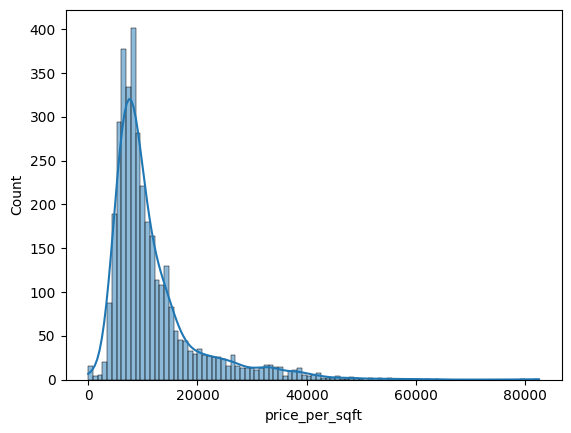

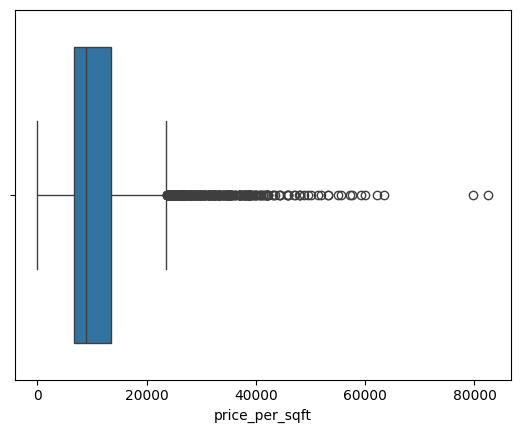

In [135]:
sns.histplot(df['price_per_sqft'],kde =True)
plt.show()

sns.boxplot(x=df['price_per_sqft'])
plt.show()

**Observation** : There is a significant change in the price_per_sqft column after outlier treatment.

---

### Conducting a more detailed analysis of the `price_per_sqft` 

In [136]:
print(df[df['price_per_sqft']>50000].shape)
df[df['price_per_sqft']>50000]

(14, 23)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
270,flat,unitech vistas,sector 70,9.00,57508.0,1565.00000,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
589,house,independent,sector 26,14.75,51864.0,2844.00000,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,2,153
641,house,unitech escape,sector 50,10.80,60000.0,1800.00000,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,2,103
661,house,nul,sector 28,12.50,51440.0,2430.00000,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,1,137
684,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.00000,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,1,75
1435,house,malibu towne,sector 47,8.50,53125.0,1600.00000,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99
1848,house,dlf city plots phase 2,sector 25,10.00,53155.0,1881.28575,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,2,114
2482,house,independent,sector 26,26.00,82540.0,3150.00000,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2910,house,independent,sector 25,16.00,59259.0,2700.00000,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
3217,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.00000,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0


**Observation** : There are only 14 values where `price_per_sqft` exceeds 50000, so we will disregard these outliers.

In [137]:
# Filtering the DataFrame to include only rows where price_per_sqft is less than 50000
df = df[df['price_per_sqft'] < 50000]
df.shape

(3645, 23)

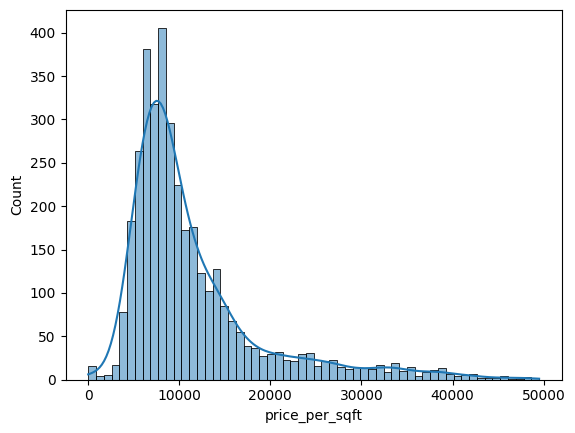

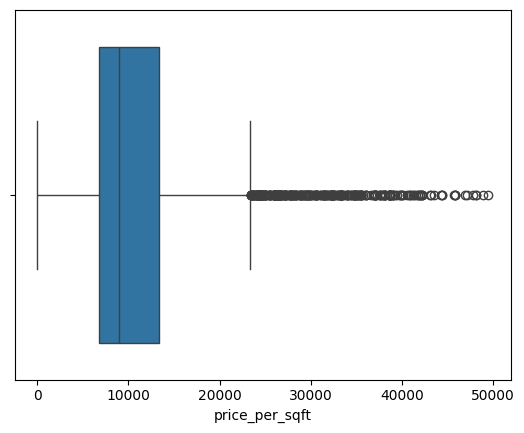

In [138]:
sns.histplot(df['price_per_sqft'],kde =True)
plt.show()

sns.boxplot(x=df['price_per_sqft'])
plt.show()

**Note** : Box plot is still showing outliers; we will take this as is for now.

---
## Outlier Treatment on `Area`

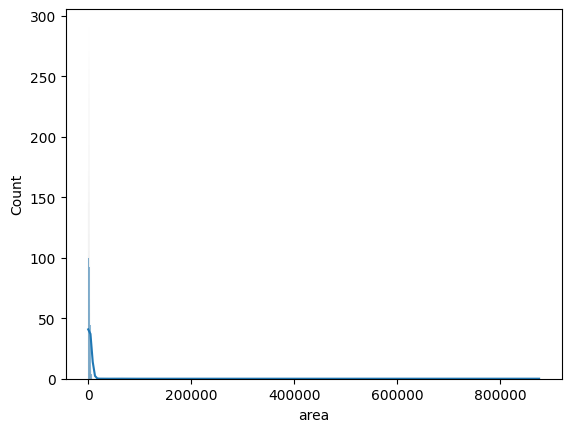

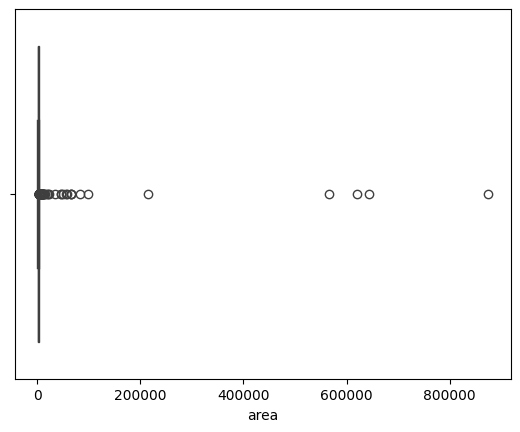

count      3645.000000
mean       2937.571997
std       23213.841799
min         145.000000
25%        1260.000000
50%        1750.000000
75%        2340.000000
max      875000.000000
Name: area, dtype: float64

In [139]:
sns.histplot(x= df['area'],kde=True)
plt.show()

sns.boxplot(x=df['area'])
plt.show()

df['area'].describe()

No of outliers in area column which is greater than 100000: 5


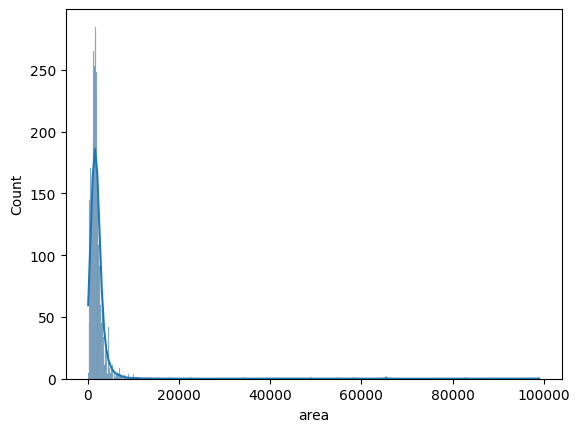

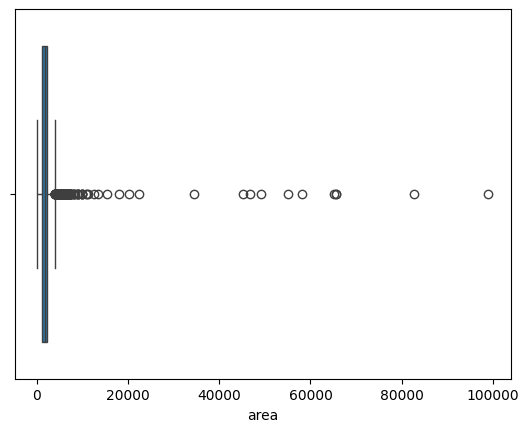

In [140]:
print("No of outliers in area column which is greater than 100000:", df[df['area'] > 100000].shape[0])

# Removing outliers where area is greater than 100000
df = df[df['area'] < 100000]

sns.histplot(df['area'], kde=True)
plt.show()

sns.boxplot(x=df['area'])
plt.show()

In [141]:
outlier_indices = df[df['area'] > 10000].index.tolist()
print("area more than 10000 : ",len(outlier_indices))

outlier_indices = df[df['area'] > 10000]
outlier_indices

area more than 10000 :  20


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
249,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
287,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.00,0,0,0,0,0,0,68
293,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,0,0
556,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
860,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1489,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1671,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
1739,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1796,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33
1904,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,2,44


area more than 10000 :  20


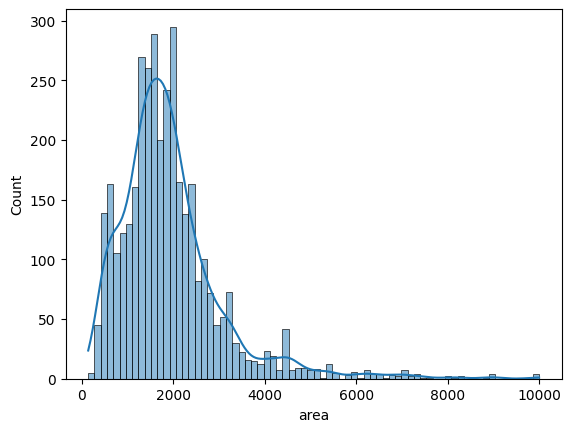

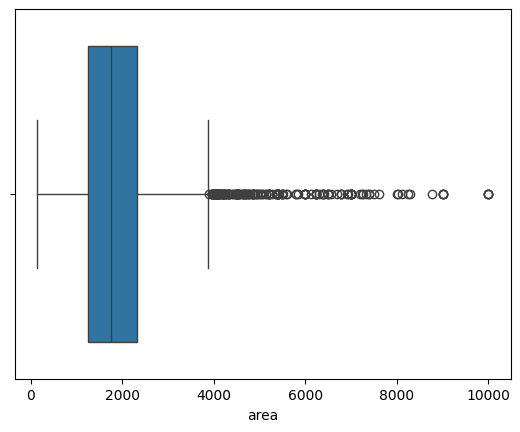

count     3620.000000
mean      1929.536445
std       1160.743398
min        145.000000
25%       1258.750000
50%       1745.000000
75%       2311.250000
max      10000.000000
Name: area, dtype: float64

In [142]:
outlier_indices = df[df['area'] > 10000].index.tolist()
print("area more than 10000 : ",len(outlier_indices))

df.drop(index=outlier_indices, inplace=True)

sns.histplot(df['area'],kde =True)
plt.show()

sns.boxplot(x=df['area'])
plt.show()

df['area'].describe()


**NOTE** :  These points are still considered outliers according to the box plot, but they are actually genuine data points.

---

---
## Outlier Treatment on `bedRoom`

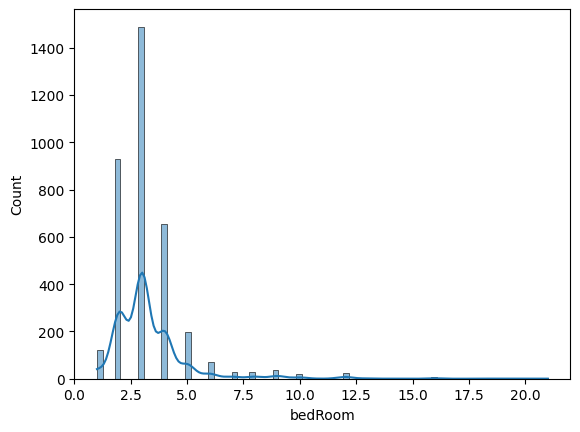

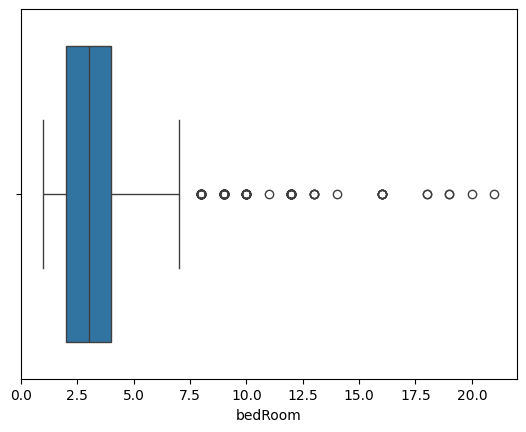

count    3620.000000
mean        3.318785
std         1.801424
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [143]:
sns.histplot(df['bedRoom'],kde=True)
plt.show()

sns.boxplot(x=df['bedRoom'])
plt.show()

df['bedRoom'].describe()

In [144]:
# looking at the bedrooms greater than 10
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False).shape

(43, 23)


before removal : (3620, 23)

after removal : (3577, 23)


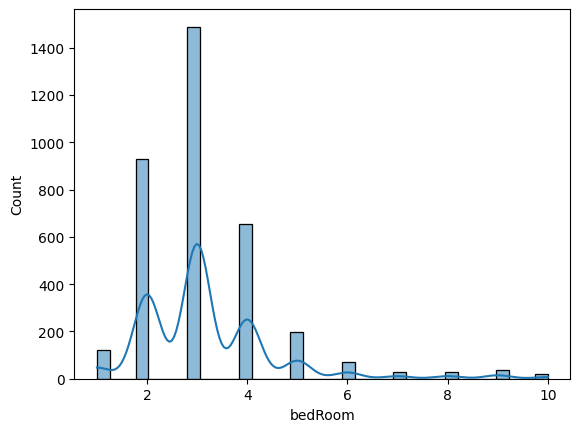

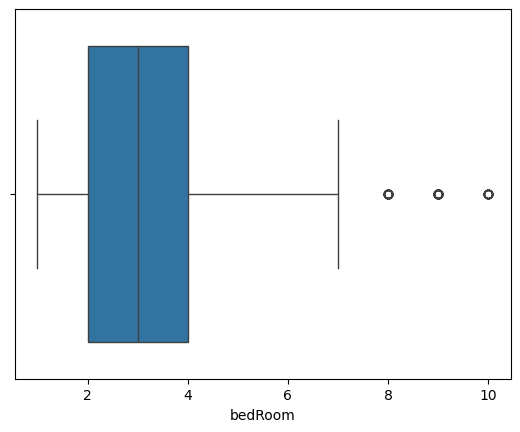

count    3577.000000
mean        3.194297
std         1.376737
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

In [145]:
# removing the bedrooms which is greater than 10 
print("\nbefore removal :", df.shape)
df = df[df['bedRoom'] <= 10]
print("\nafter removal :", df.shape)

sns.histplot(df['bedRoom'],kde=True)
plt.show()

sns.boxplot(x=df['bedRoom'])
plt.show()

df['bedRoom'].describe()

---
## Outlier Treatment on `bathroom`

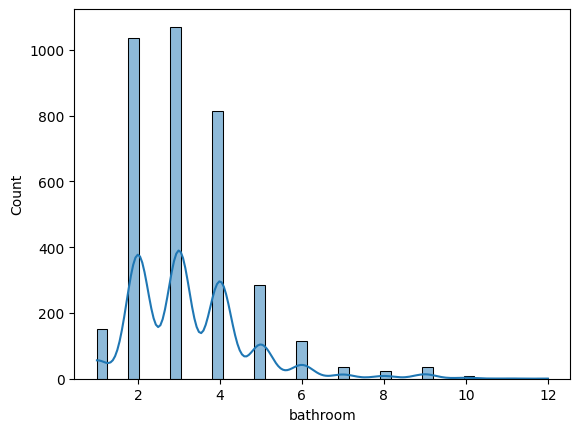

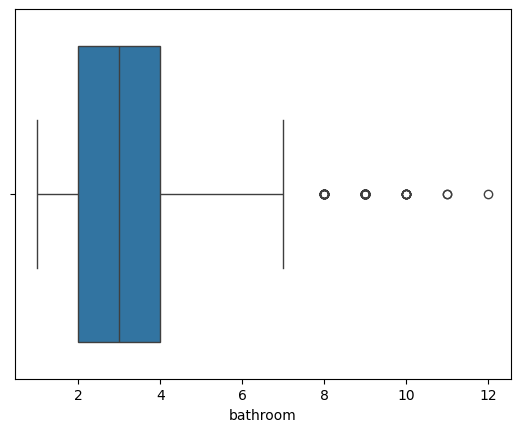

count    3577.000000
mean        3.264467
std         1.443358
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [146]:
sns.histplot(df['bathroom'],kde=True)
plt.show()

sns.boxplot(x=df['bathroom'])
plt.show()

df['bathroom'].describe()


before removal : (3577, 23)

after removal : (3574, 23)


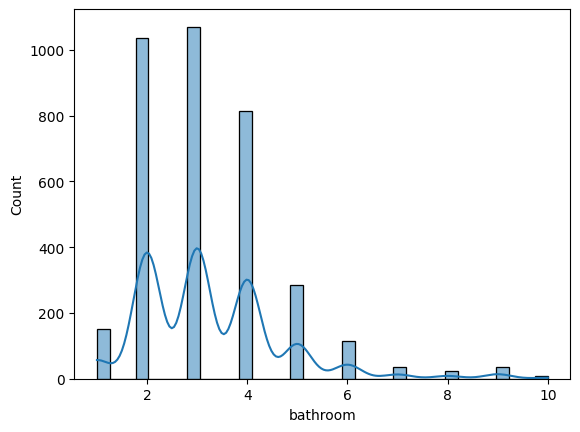

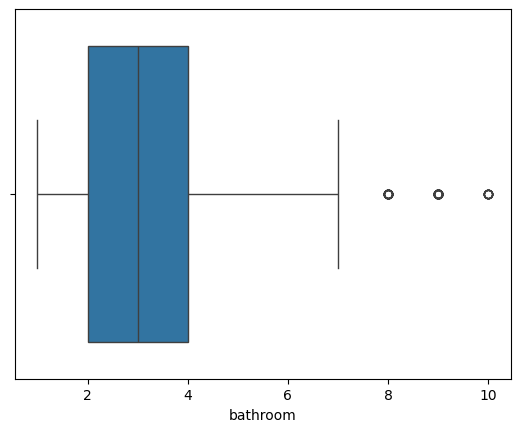

count    3574.000000
mean        3.257694
std         1.424827
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bathroom, dtype: float64

In [147]:
#removing the rows whoch have more than 10 bathroom 

print("\nbefore removal :", df.shape)
df = df[df['bathroom'] <= 10]
print("\nafter removal :", df.shape)

sns.histplot(df['bathroom'],kde=True)
plt.show()

sns.boxplot(x=df['bathroom'])
plt.show()

df['bathroom'].describe()

In [148]:
df.shape

(3574, 23)

---
## Outlier Treatment on `super_built_up_area`

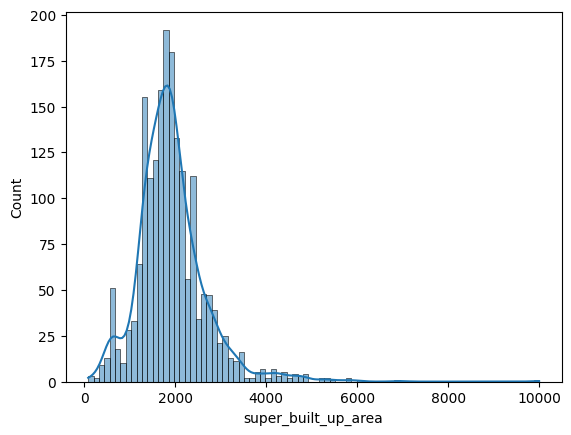

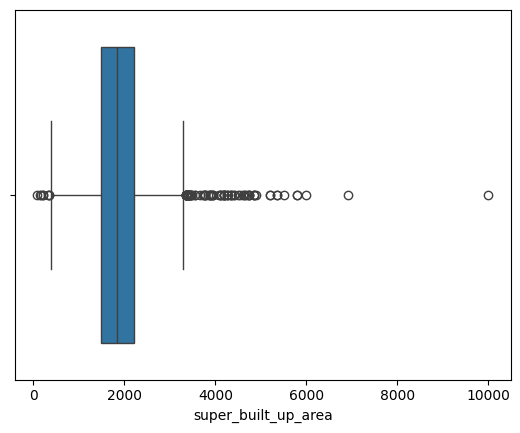

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [149]:
sns.histplot(df['super_built_up_area'],kde=True)
plt.show()

sns.boxplot(x=df['super_built_up_area'])
plt.show()

df['super_built_up_area'].describe()

In [150]:

df['super_built_up_area'].isnull().sum()

1699

In [151]:
df.shape

(3574, 23)

---
## Outlier Treatment on `built_up_area`

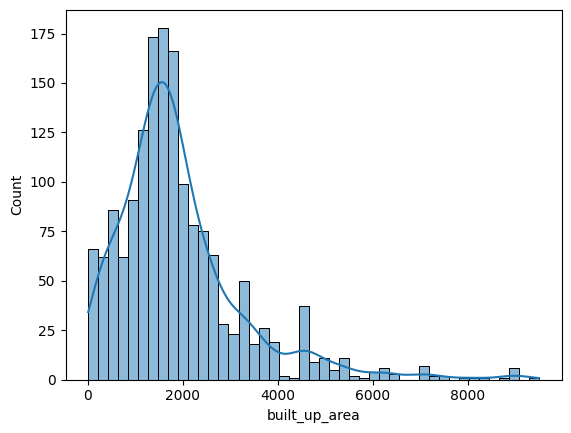

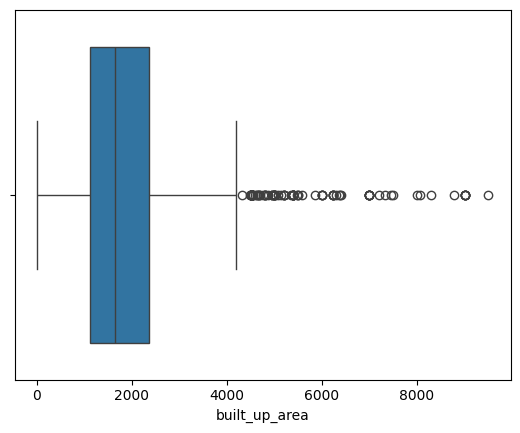

count    1603.000000
mean     1921.008128
std      1365.351351
min        14.000000
25%      1120.000000
50%      1650.000000
75%      2367.000000
max      9500.000000
Name: built_up_area, dtype: float64

In [152]:
sns.histplot(df['built_up_area'],kde=True)
plt.show()

sns.boxplot(x=df['built_up_area'])
plt.show()

df['built_up_area'].describe()

Remarks : No outlier

In [153]:
df['built_up_area'].isnull().sum()

1971

In [154]:
df.shape

(3574, 23)

---
## Outlier Treatment on `carpet_area`

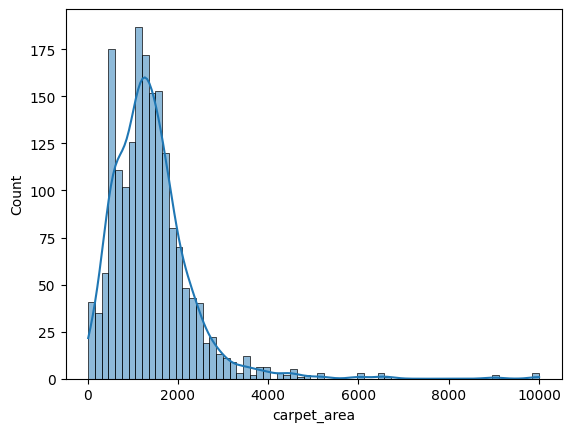

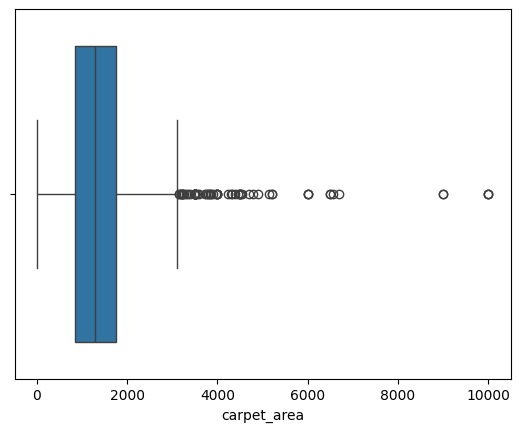

count     1842.000000
mean      1412.976530
std        928.219146
min         15.000000
25%        845.000000
50%       1299.000000
75%       1760.000000
max      10000.000000
Name: carpet_area, dtype: float64

In [155]:
sns.histplot(df['carpet_area'],kde=True)
plt.show()

sns.boxplot(x=df['carpet_area'])
plt.show()

df['carpet_area'].describe()

In [156]:
df['carpet_area'].isnull().sum()

1732

In [157]:
df.shape

(3574, 23)

---
## Outlier Treatment on `luxury_score`

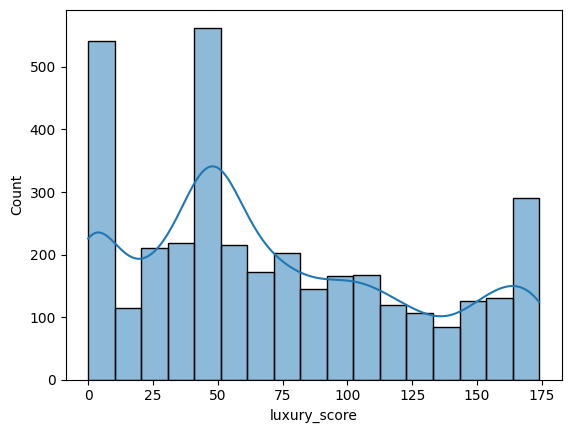

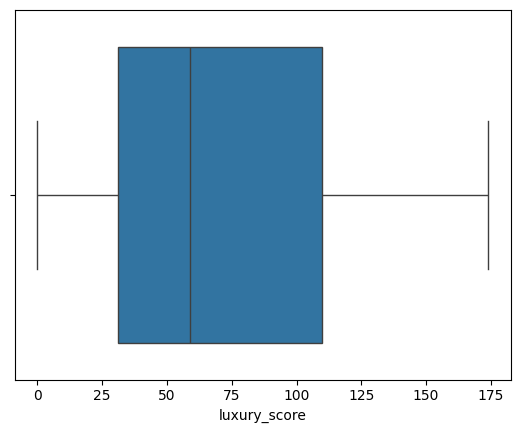

count    3574.000000
mean       71.846111
std        53.270690
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

In [158]:
sns.histplot(df['luxury_score'],kde=True)
plt.show()

sns.boxplot(x=df['luxury_score'])
plt.show()

df['luxury_score'].describe()

In [159]:
df.shape

(3574, 23)

---
## **Next Step** :  deeper investigate into `price_per_sqft`

In [160]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3,3,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,2,97
1,flat,raheja vedaanta,sector 108,0.85,4637.0,1833.0,Super Built up area 1833(170.29 sq.m.)Built Up...,3,3,2,2.0,North-East,Relatively New,1833.0,1500.0,1350.00,0,1,0,0,0,0,65
2,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,0.0,NaN,New Property,NaN,NaN,720.00,0,0,0,1,0,1,0
3,flat,laxmi pareena,sector 99a,0.30,6667.0,450.0,Carpet area: 450 (41.81 sq.m.),2,1,0,12.0,North,Undefined,NaN,NaN,450.00,0,0,0,0,0,0,0
4,flat,emaar gurgaon greens,sector 102,1.55,9394.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,7.0,North,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,2,152


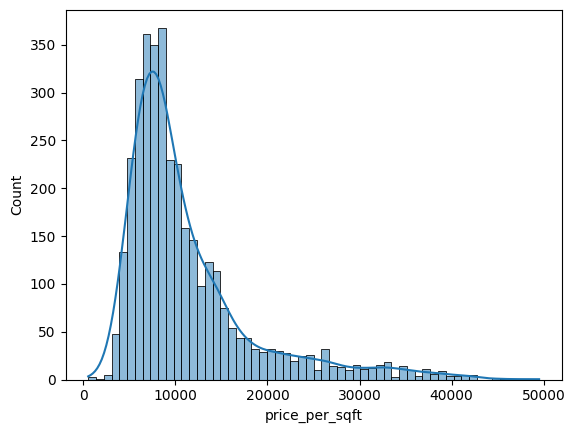

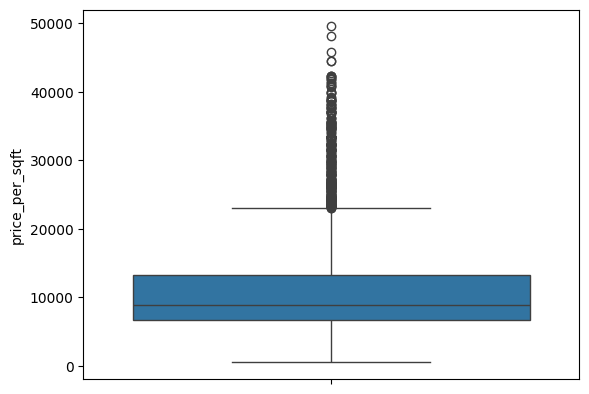

In [161]:
sns.histplot(df['price_per_sqft'],kde=True)
plt.show()

sns.boxplot(df['price_per_sqft'])
plt.show()

In [162]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
118,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,2,60
202,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,2,103
266,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,2,44
827,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,2,121
1118,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
1427,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,2,88
2187,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
3641,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,1,0
3760,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,2,7


**Note:** This threshold will be used to filter out properties with suspiciously low area per bedroom,
which could be due to data entry errors or represent atypical properties.

In [163]:
# Filter dataframe for price_per_sqft <= 20000 to remove extreme outliers
x = df[df['price_per_sqft'] <= 20000]

# Calculate the 2nd percentile of area per bedroom
# This helps identify unusually small apartments or potential data errors
value = (x['area']/x['bedRoom']).quantile(0.05)

# create a new column `area_room_ratio`
df['area_room_ratio'] = df['area']/df['bedRoom']

# this will give us the properties which have area per bedroom less than 5% of the 2nd percentile value
# and it might be due to data entry errors or represent atypical properties.
print("\n Number of rows which have area per bedroom less than 5% of the 2nd percentile value :",df[df['area_room_ratio']<value].shape[0])
df[df['area_room_ratio']<value].sample(5)


 Number of rows which have area per bedroom less than 5% of the 2nd percentile value : 188


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
423,house,uppal southend,sector 49,3.75,25562.0,1467.0,Plot area 163(136.29 sq.m.),6,6,3,3.0,East,Moderately Old,NaN,1467.0,NaN,0,0,0,0,1,0,49,244.500000
1724,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
2408,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
2495,flat,signature global the millennia 3,sector 37d,0.50,7143.0,700.0,Carpet area: 700 (65.03 sq.m.),3,3,2,2.0,NaN,Under Construction,NaN,NaN,700.0,0,0,0,0,0,0,31,233.333333
2238,house,independent,sector 47,0.99,17188.0,576.0,Plot area 64(53.51 sq.m.),4,4,3,4.0,NaN,Relatively New,NaN,576.0,NaN,0,0,0,0,0,0,13,144.000000


- there are 188 data points which have area per bedroom less than 5% of the 2nd percentile value.
- 8,9 bhk in small area ; these may be data entry errors.

In [164]:
# exporting the outliers to csv file for manual inspection
# df[df['area_room_ratio']<value].to_csv('area_room_ratio_outliers.csv')

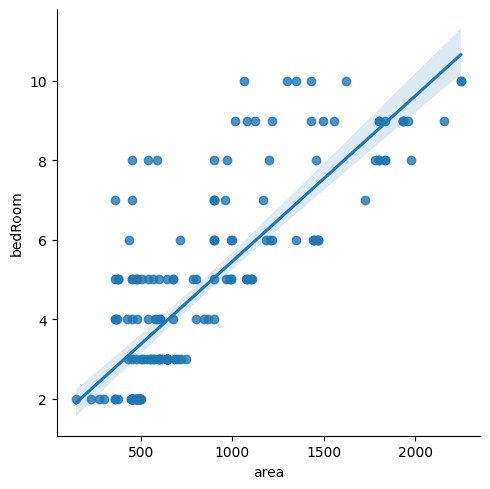

In [165]:
# plotting the scatter plot to check the relationship between area and bedroom
sns.lmplot(data=df[df['area_room_ratio']<value],x='area',y='bedRoom')
plt.show()

In [166]:
# remove the rows which have area per bedroom is less than 100; they are definitely outliers or data entry errors
df = df[df['area_room_ratio']>=100]
df.shape
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3,3,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,2,97,392.333333
1,flat,raheja vedaanta,sector 108,0.85,4637.0,1833.0,Super Built up area 1833(170.29 sq.m.)Built Up...,3,3,2,2.0,North-East,Relatively New,1833.0,1500.0,1350.00,0,1,0,0,0,0,65,611.000000
2,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,0.0,NaN,New Property,NaN,NaN,720.00,0,0,0,1,0,1,0,360.000000
3,flat,laxmi pareena,sector 99a,0.30,6667.0,450.0,Carpet area: 450 (41.81 sq.m.),2,1,0,12.0,North,Undefined,NaN,NaN,450.00,0,0,0,0,0,0,0,225.000000
4,flat,emaar gurgaon greens,sector 102,1.55,9394.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,7.0,North,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,2,152,550.000000


In [167]:

outliers_df = df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

# divide the bedroom by floorNum to get the actual bedroom
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

/tmp/ipykernel_5374/3490817244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [168]:
df.update(outliers_df)
df['area_room_ratio'] = df['area']/df['bedRoom']


In [169]:
# remove the rows which have area_room_ratio less than 250 and bedroom is greater than 4
df = df[~((df['area_room_ratio']<250) & (df['bedRoom']>4))]
df.shape

(3541, 24)

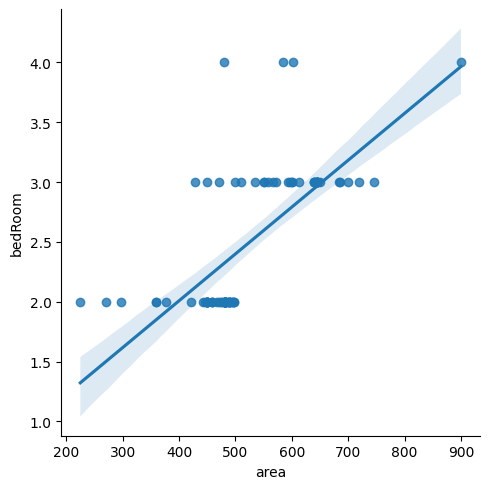

In [170]:
# plotting the scatter plot to check the relationship between area and bedroom
sns.lmplot(data=df[df['area_room_ratio']<value],x='area',y='bedRoom')
plt.show()

**Note** : Now You can see that the scatter plot is almost linear and are not showing any outliers.

In [171]:
# saving the dataframe to csv file
df.to_csv('../data/clean-data/flats-house-cleaned-v3.csv',index=False)

**END**

---